<a href="https://colab.research.google.com/github/saritmaitra/MultiClass_Classification/blob/master/MultiClass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyforest
from pyforest import *
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

In [2]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/glass/glass.data")
df = pd.read_csv(target_url, header=None)
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'type']
df.set_index('Id', inplace=True)
print('Data loading:')
df.head()

<IPython.core.display.Javascript object>

Data loading:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [30]:
print('Checking details in the dataset:')
d = numpy.array(['building_windows_float_processed', 'building_windows_non_float_processed',
                 'vehicle_windows_float_processed','containers',  'tableware', 'headlamps'])

print("Keys:", df.keys()) # print keys of dataset

# shape of data and target
print("Data shape", df.shape) 
print("Target shape", df.type.shape) # (150,)

print("data:", df[:4]) # first 4 elements

# unique targets
print("Unique targets:", np.unique(df['type'])) 
# counts of each target
print("Bin counts for targets:", np.bincount(df['type']))

print("Feature names:", df.drop(columns= ['type'], axis=1).columns)
print("Target names:", d)

Checking details in the dataset:
Keys: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')
Data shape (214, 10)
Target shape (214,)
data:          RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  type
Id                                                               
1   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
2   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
3   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
4   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1


<IPython.core.display.Javascript object>

Unique targets: [1 2 3 5 6 7]


<IPython.core.display.Javascript object>

Bin counts for targets: [ 0 70 76 17  0 13  9 29]
Feature names: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')
Target names: ['building_windows_float_processed' 'building_windows_non_float_processed'
 'vehicle_windows_float_processed' 'containers' 'tableware' 'headlamps']


Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps


The glass problem presents chemical compositions of various
types of glass. The objective of the problem is to determine the use for the glass.

The possible types of glass include glass from building windows, glass from
vehicle windows, glass containers, and so on. The motivation for determining
the type of glass is forensics. At the scene of an accident or a crime, there are fragments of glass, and determining their origin can help determine who is at fault or who committed the crime.

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


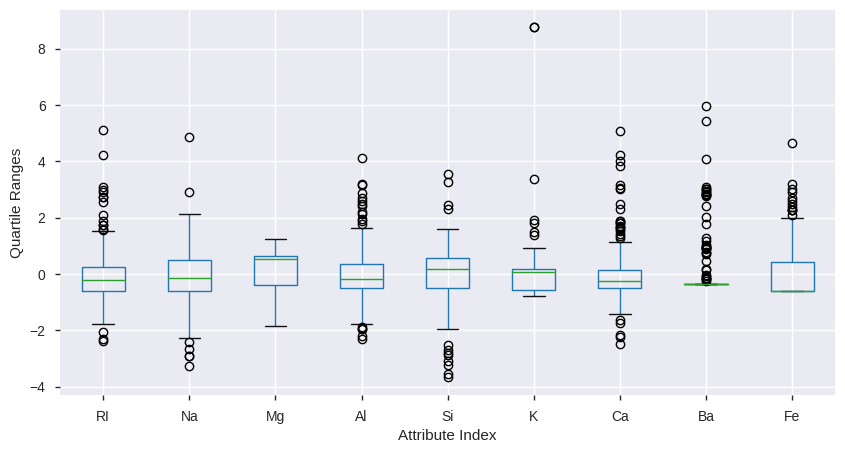

In [ ]:
plt.figure(figsize=(10,5))
boxplot = X_norm.boxplot(column= ['RI', 'Na', 'Mg', 'Al', 'Si',
'K', 'Ca', 'Ba', 'Fe'])
plt.xlabel("Attribute Index")
plt.ylabel(("Quartile Ranges"))
plt.show()

In [ ]:
df['type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type, dtype: int64

The box plot of the glass data attributes shows quite a few outliers.
The glass data have a couple of elements that may drive the outlier behavior. One is that the problem is a classification problem. There’s not necessarily any continuity in relationship between attribute values and class membership—no reason to expect proximity of attribute values across classes. Another unique feature of the glass data is that it is somewhat unbalanced. The number of examples of each class runs from 76 for the most populous class to 9 for the least populous.

The average statistics can be dominated by the values for the most populous
classes and there’s no reason to expect members of other classes to have similar
attribute values. The radical behavior can be a good thing for distinguishing
classes from one another, but it also means that a method for making predictions
has to be able to trace a fairly complicated boundary between the different
classes.

<IPython.core.display.Javascript object>

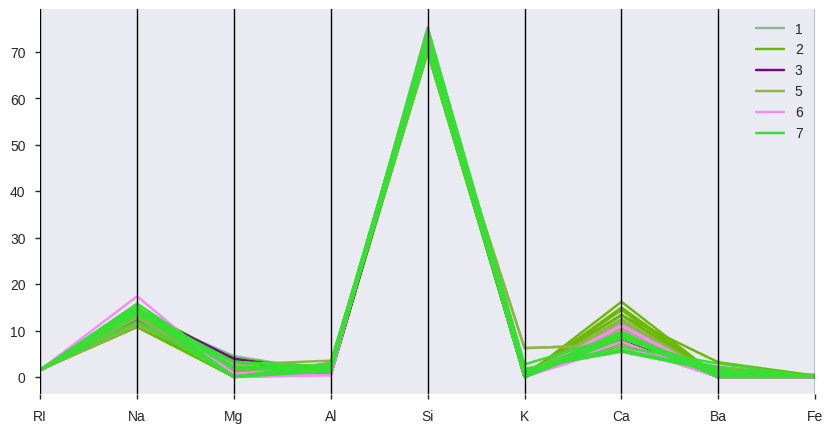

In [ ]:
plt.figure(figsize=(10,5))

pd.plotting.parallel_coordinates(
    df[['RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'type']], 
    'type')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

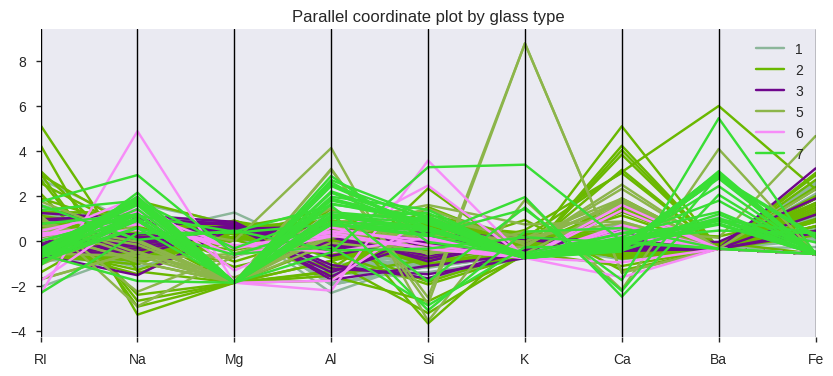

In [ ]:
plt.figure(figsize=(10,4))
X = df[['RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe']]
X_norm = (X - X.mean())/X.std()
X_norm = pd.concat([X_norm, df['type']], axis=1)
pd.plotting.parallel_coordinates(X_norm, 'type')
plt.title("Parallel coordinate plot by glass type")
plt.show()

In [ ]:
!pip install ppscore
import ppscore as pps

<IPython.core.display.Javascript object>

Predictive power score


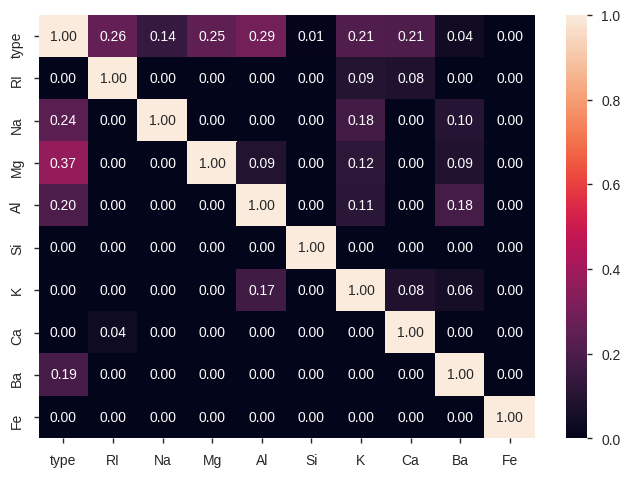

In [ ]:
sns.heatmap(pps.matrix(df[['type', 'RI', 'Na', 'Mg', 'Al', 'Si',
'K', 'Ca', 'Ba', 'Fe']]),annot=True,fmt=".2f")
print('Predictive power score')
plt.show()

In [ ]:
#Creating the dependent variable class
factor = pd.factorize(df['target'])
df.target = factor[0]
definitions = factor[1]
print(df.target.head())
print(definitions)

<IPython.core.display.Javascript object>

index
1    0
2    0
3    0
4    0
5    0
Name: target, dtype: int64
Int64Index([1, 2, 3, 5, 6, 7], dtype='int64')


In [ ]:
d = numpy.array(['building_windows_float_processed', 'building_windows_non_float_processed',
                           'vehicle_windows_float_processed','containers',  'tableware', 'headlamps'])
d

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype='<U36')

In [ ]:
from collections import Counter

# summarize the shape of the dataset
print(df.shape)
# summarize the class distribution
target = df.values[:,-1]
counter = Counter(df['type'])
for k,v in counter.items():
	per = v / len(df) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))


(214, 10)
Class=1, Count=70, Percentage=32.710%
Class=2, Count=76, Percentage=35.514%
Class=3, Count=17, Percentage=7.944%
Class=5, Count=13, Percentage=6.075%
Class=6, Count=9, Percentage=4.206%
Class=7, Count=29, Percentage=13.551%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x360 with 0 Axes>

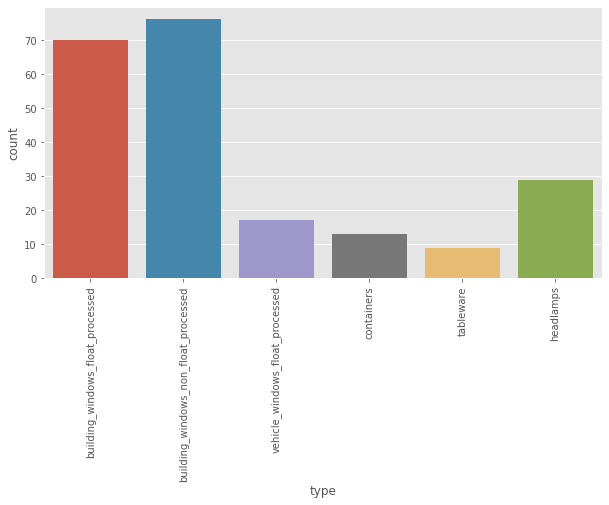

In [ ]:
import pandas.testing as tm
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
figure, ax = plt.subplots(1,1, figsize=(10,5))

#variable_names = numpy.array(['building_windows_float_processed', 'building_windows_non_float_processed',
#                            'vehicle_windows_float_processed','containers',  'tableware', 'headlamps'])

sns.countplot(x = 'type', data=df)
ax.set_xticklabels( ('building_windows_float_processed', 'building_windows_non_float_processed',
                             'vehicle_windows_float_processed','containers',  'tableware', 'headlamps'), rotation = 90 )
plt.show()

In [ ]:
pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.4MB/s 


In [ ]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-"
"databases/glass/glass.data")
df = pd.read_csv(target_url, header=None)
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si','K', 'Ca', 'Ba', 'Fe', 'type']
df.set_index('Id', inplace=True)

X = df.drop(columns = ['type'], axis=1)
y = df['type']

#from skmultilearn.model_selection import iterative_train_test_split
#X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size = 0.20)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size=0.20, stratify=y, random_state=123)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

miss_class_error = []
nTreeList = range(50, 2000, 50)
for iTrees in nTreeList:
  depth = None
  max_feat = 4 #try tweaking
  rfc = RandomForestClassifier(n_estimators=iTrees,
                                             max_depth=depth, max_features=max_feat,
                                             oob_score=False, random_state=123)
print('RandomForest model fit:')
rfc.fit(X_train, y_train)

RandomForest model fit:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1950,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

### Measuring the Accuracy

In [ ]:
prediction = rfc.predict(X_test)
score = accuracy_score(y_test, prediction)

print('Accuracy for a single decision stump:', round(score,2))
print("Miss classification Error:" , round((1-score),2))

Accuracy for a single decision stump: 0.84
Miss classification Error: 0.16


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
pd.crosstab(y_test, prediction, rownames=['Actual'], colnames=['Predicted'], margins=True)

<IPython.core.display.Javascript object>

Predicted,1,2,3,5,6,7,All
Actual,,,,,,,
1,12,1,1,0,0,0,14
2,1,13,1,0,0,0,15
3,1,0,2,0,0,0,3
5,0,0,0,3,0,0,3
6,0,1,0,0,1,0,2
7,0,1,0,0,0,5,6
All,14,16,4,3,1,5,43


<IPython.core.display.Javascript object>


Confusion Matrix plot


<IPython.core.display.Javascript object>

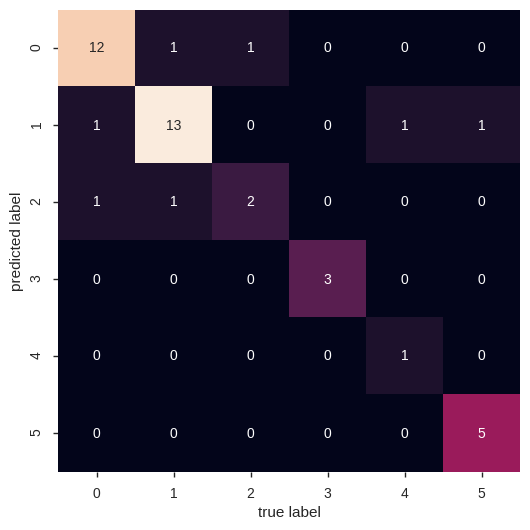

In [ ]:
#generate confusion matrix
cm = confusion_matrix(y_test, prediction)
pd.DataFrame(cm)

plt.figure(figsize=(10,6))
print('')
print("Confusion Matrix plot")
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from cycler import cycler
from sklearn.preprocessing import label_binarize

y = label_binarize(y, classes=[1,2,3,5,6,7])
n_classes = 6
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y,
                                                test_size=0.20, random_state=123)
clf = OneVsRestClassifier(RandomForestClassifier(random_state=123))
yscore = clf.fit(xtrain, ytrain).predict_proba(xtest)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ytest[:, i], yscore[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(ytest.ravel(), yscore.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<IPython.core.display.Javascript object>

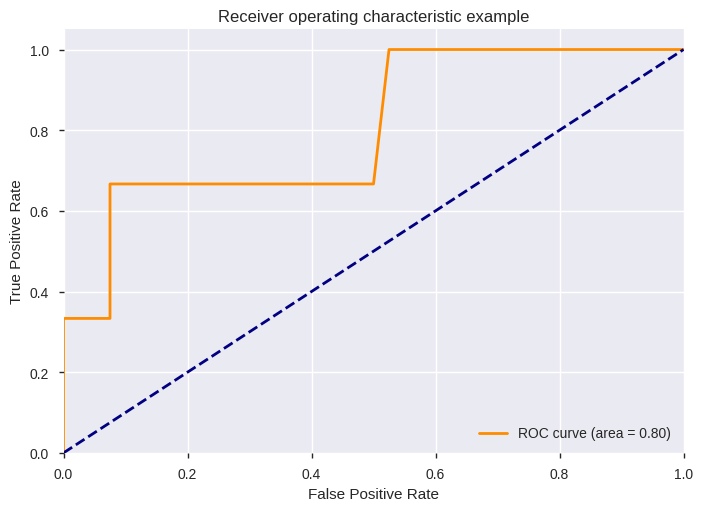

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### ROC curves for the multiclass

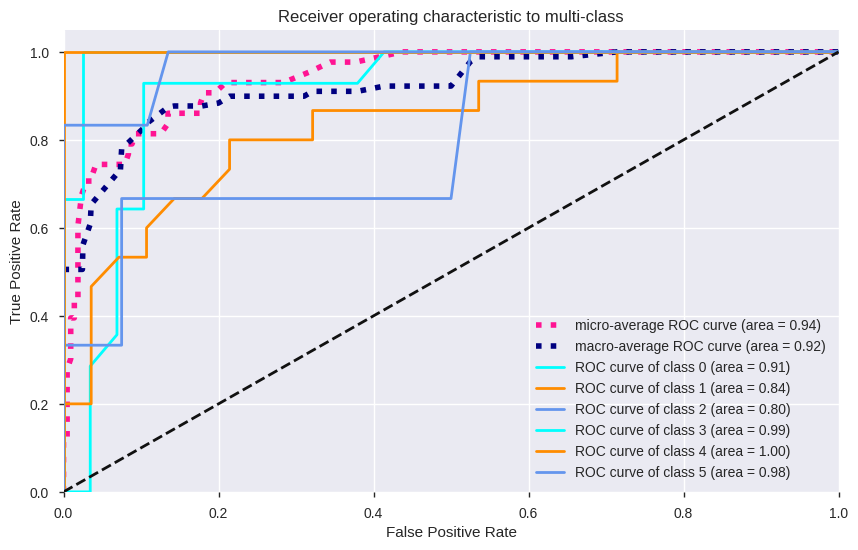

In [ ]:
from numpy import interp
from itertools import cycle


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10,6))
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve

yprob = rfc.predict_proba(xtest)

macro_roc_auc_ovo = roc_auc_score(ytest, yprob, multi_class="ovo",average="macro")
weighted_roc_auc_ovo = roc_auc_score(ytest, yprob, multi_class="ovo",average="weighted")
macro_roc_auc_ovr = roc_auc_score(ytest, yprob, multi_class="ovr",average="macro")
weighted_roc_auc_ovr = roc_auc_score(ytest, yprob, multi_class="ovr",average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.996825 (macro),
0.993355 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.996825 (macro),
0.993355 (weighted by prevalence)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(prediction, y_test))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.87      0.81      0.84        16
           3       0.67      0.50      0.57         4
           5       1.00      1.00      1.00         3
           6       0.50      1.00      0.67         1
           7       0.83      1.00      0.91         5

    accuracy                           0.84        43
   macro avg       0.79      0.86      0.81        43
weighted avg       0.84      0.84      0.84        43



In [ ]:
#plot training and test errors vs number of trees in ensemble
plt.plot(nTreeList, missCLassError)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Missclassification Error Rate')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

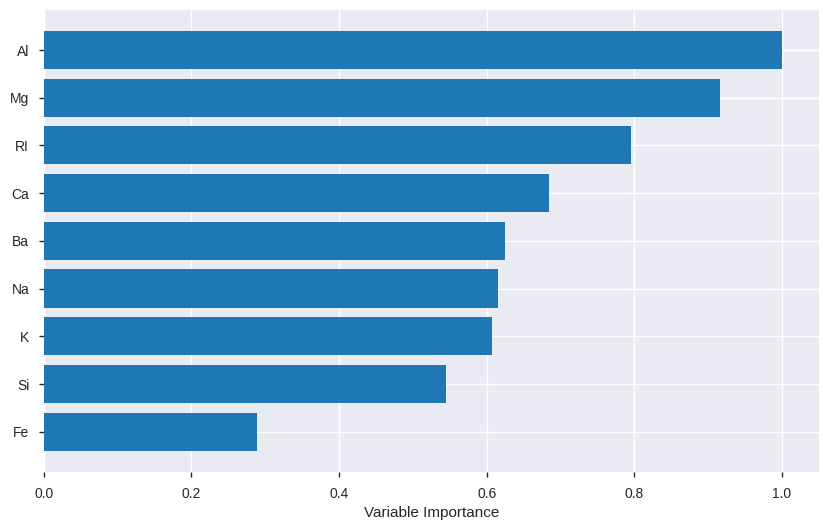

In [ ]:
plt.figure(figsize=(10,6))
#variable_names = numpy.array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca',
#'Ba', 'Fe', 'Type'])

# Plot feature importance
feature_importance = rfc.feature_importances_

# normalize by max importance
feature_importance = feature_importance / feature_importance.max()

#plot variable importance
idxSorted = numpy.argsort(feature_importance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plt.barh(barPos, feature_importance[idxSorted], align='center')
plt.yticks(barPos, variable_names[idxSorted])
plt.xlabel('Variable Importance')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
rf_cv_score=cross_val_score(estimator=rfc, X=X_train, y=X_test,cv=5)
print(rf_cv_score)

ValueError: ignored

In [ ]:
from xgboost import XGBClassifier

#instantiate model
nEst = 500
depth = 3
learnRate = 0.003
maxFeatures = 3
subSamp = 0.5
xgb = XGBClassifier(n_estimators=nEst,objective='multi:softmax',num_class = 6,
                                 max_depth=depth,learning_rate=learnRate,
                                 max_features=maxFeatures,subsample=subSamp)

#train
xgb.fit(xTrain, yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.003, max_delta_step=0, max_depth=3,
              max_features=3, min_child_weight=1, missing=None,
              n_estimators=500, n_jobs=1, nthread=None, num_class=6,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.5, verbosity=1)

In [ ]:
print('Accuracy for Gradient Booing: {}'.format(xgb.score(xTest, yTest)))

Accuracy for Gradient Booing: 0.7674418604651163


In [ ]:
y_pred = xgb.predict(xTest) 
pred = [round(value) for value in y_pred]
accuracy = accuracy_score(yTest, pred) 

print("Accuracy for Gradient Booing: %.2f%%" % (accuracy * 100.0))

Accuracy for Gradient Booing: 76.74%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(yTest, pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report")
print(classification_report(yTest, pred))

Confusion Matrix:
[[ 6  5  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0 10]]
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.55      0.63        11
           2       0.62      1.00      0.76        13
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       1.00      0.91      0.95        11

    accuracy                           0.77        43
   macro avg       0.73      0.69      0.69        43
weighted avg       0.75      0.77      0.74        43



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# calculate prediction
precision = precision_score(yTest, pred, labels=[1,2,3,5,6,7], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.767


In [ ]:
from sklearn.metrics import recall_score
# calculate recall
recall = recall_score(yTest, pred, labels=[1,2,3,5,6,7], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.767


<IPython.core.display.Javascript object>

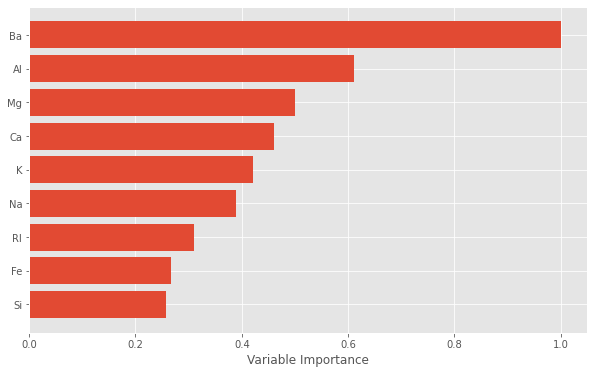

In [ ]:
plt.figure(figsize=(10,6))

# Plot feature importance
featureImportance =xgb.feature_importances_
# normalize by max importance
featureImportance = featureImportance / featureImportance.max()
#plot variable importance
idxSorted = numpy.argsort(featureImportance)
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, glassNames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

In [ ]:
from sklearn.metrics import precision_score
print(precision_score(yTest, best_preds, average='macro'))

0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#generate confusion matrix
pList = prediction.tolist()
confusion_matrix = confusion_matrix(yTest, pList)
print('')
print("Confusion Matrix")
print(confusion_matrix)

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))

print('')
print("Confusion Matrix plot")
mat = confusion_matrix(yTest, prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');